## Metadata


The dataset for this competition (both train and test) was generated from a deep learning model trained on the [Bank Customer Churn Prediction dataset](https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction). Feature distributions are close to, but not exactly the same, as the original.



- `Customer ID:` A unique identifier for each customer
- `Surname:` The customer's surname or last name
- `Credit Score:` A numerical value representing the customer's credit score
- `Geography:` The country where the customer resides
- `Gender:` The customer's gender
- `Age:` The customer's age
- `Tenure:` The number of years the customer has been with the bank
- `Balance:` The customer's account balance
- `NumOfProducts:` The number of bank products the customer uses (e.g., savings account, credit card)
- `HasCrCard:` Whether the customer has a credit card
- `IsActiveMember:` Whether the customer is an active member
- `EstimatedSalary:` The estimated salary of the customer
- `Exited:` Whether the customer has churned (Target Variable)


#### <div><h2>Import Liabraries</h2></div>


In [2]:
!pip install xgboost
!pip install catboost 


[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



     -------------------------------------- 124.9/124.9 MB 1.8 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, SimpleImputer, IterativeImputer
from sklearn.linear_model import BayesianRidge 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score


<h4><b>Load Dataset</b></h4>


In [6]:
import os

In [7]:
os.getcwd()

'F:\\Capacitaciones\\DMC\\DATA SCIENCE ADVANCE\\9. Machine Learning Engineering\\Trabajo Final\\notebooks'

In [9]:
ruta = "F:\\Capacitaciones\\DMC\\DATA SCIENCE ADVANCE\\9. Machine Learning Engineering\\Trabajo Final"

In [54]:
df_train = pd.read_csv(ruta + '/data/raw/train.csv')
df_test = pd.read_csv(ruta + '/data/raw/test_score.csv')

In [55]:
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


<h4><b>Statistical Summary</b></h4>


In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [14]:
df_train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [15]:
df_train.shape

(165034, 14)


<h4><b>Data description</b></h4>


<h4><b>Checking for missing values</b></h4>


In [48]:
df_train.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<h4><b>Correlation Matrix</b></h4>


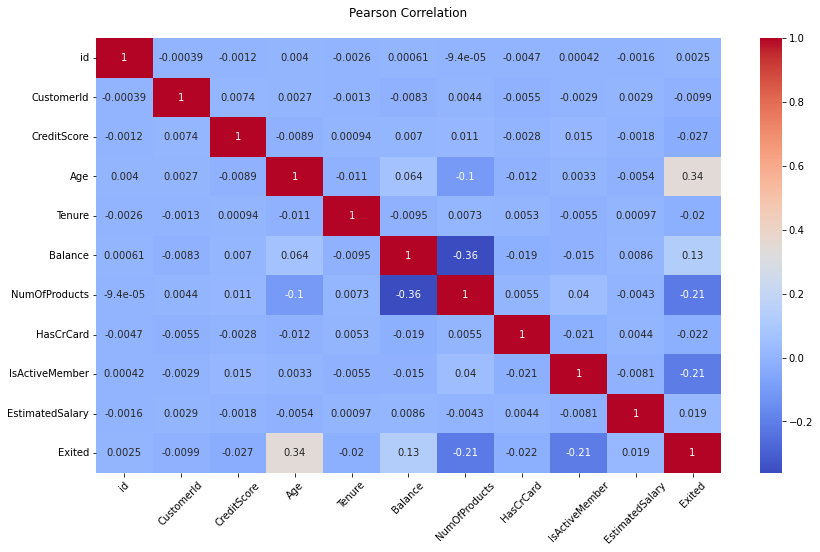

In [17]:
fig = plt.figure(figsize=(14, 8))

sns.heatmap(df_train.select_dtypes(['int', 'float']).corr(), cmap = 'coolwarm', annot=True)
plt.title("Pearson Correlation\n")
plt.xticks(rotation=45)

plt.show()

In [49]:
X_train1 = df_train.drop(['Exited'], axis=1)
y_train1 = df_train['Exited']

X_train1_0, X_test1_0, y_train1_0, y_test1_0 = train_test_split(X_train1, y_train1, test_size=0.2, random_state=0)

In [50]:
bank_train =X_train1_0
bank_train['Exited'] = y_train1_0
bank_new = X_test1_0
bank_new['Exited'] = y_test1_0

In [47]:
bank_train.to_csv("../data/raw/bank_default.csv", index=False)
bank_new.to_csv("../data/raw/bank_new.csv", index=False)


#### Features' scaling and ML model


In [18]:
train = df_train.drop(['id', 'CustomerId', 'Surname'], axis=1)
test_id = df_test['id']
test = df_test.drop(['id', 'CustomerId', 'Surname'], axis=1)

num_col = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
obj_col = ['Geography', 'Gender']

In [19]:
min_max = MinMaxScaler()
one_hot_encoder = OneHotEncoder()

#### Divide train_data into train and val


In [20]:
X = train.drop(['Exited'], axis=1)
y = train['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [46]:
y_train

15225     0
28152     0
117535    0
92286     0
133713    0
         ..
97639     0
95939     0
152315    0
117952    0
43567     1
Name: Exited, Length: 132027, dtype: int64

In [34]:
y_test.value_counts(normalize = True )

0    0.790378
1    0.209622
Name: Exited, dtype: float64

In [35]:
y_train.value_counts(normalize = True)

0    0.787907
1    0.212093
Name: Exited, dtype: float64

#### Preprocessing

In [21]:
preprocessing = ColumnTransformer([
        ("num", min_max, num_col),
        ("obj", one_hot_encoder, obj_col),
        ('cat', 'passthrough', ['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember'])
])

In [22]:
X_train = preprocessing.fit_transform(X_train)
X_test = preprocessing.transform(X_test)

<h4><b>Models</b></h4>


In [23]:
models = {
    'XGBClassifier': XGBClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),  
    'CatBoostClassifier': CatBoostClassifier(),
}

<h4><b>Grid Search and model training</b></h4>


In [24]:
models_names = []
accuracy_scores = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    models_names.append(model_name)
    accuracy_scores.append(accuracy)

Learning rate set to 0.082881
0:	learn: 0.6164458	total: 571ms	remaining: 9m 30s
1:	learn: 0.5594446	total: 716ms	remaining: 5m 57s
2:	learn: 0.5133958	total: 858ms	remaining: 4m 45s
3:	learn: 0.4773867	total: 922ms	remaining: 3m 49s
4:	learn: 0.4475954	total: 996ms	remaining: 3m 18s
5:	learn: 0.4258708	total: 1.06s	remaining: 2m 56s
6:	learn: 0.4086012	total: 1.11s	remaining: 2m 37s
7:	learn: 0.3946891	total: 1.17s	remaining: 2m 24s
8:	learn: 0.3833393	total: 1.23s	remaining: 2m 15s
9:	learn: 0.3736951	total: 1.29s	remaining: 2m 7s
10:	learn: 0.3654360	total: 1.36s	remaining: 2m 2s
11:	learn: 0.3585255	total: 1.42s	remaining: 1m 56s
12:	learn: 0.3531918	total: 1.46s	remaining: 1m 50s
13:	learn: 0.3489714	total: 1.55s	remaining: 1m 49s
14:	learn: 0.3458062	total: 1.66s	remaining: 1m 48s
15:	learn: 0.3432448	total: 1.71s	remaining: 1m 45s
16:	learn: 0.3403733	total: 1.76s	remaining: 1m 42s
17:	learn: 0.3381741	total: 1.84s	remaining: 1m 40s
18:	learn: 0.3362256	total: 1.91s	remaining: 1

160:	learn: 0.3148598	total: 11.2s	remaining: 58.5s
161:	learn: 0.3148223	total: 11.3s	remaining: 58.3s
162:	learn: 0.3147791	total: 11.4s	remaining: 58.3s
163:	learn: 0.3147446	total: 11.5s	remaining: 58.8s
164:	learn: 0.3146972	total: 11.6s	remaining: 58.6s
165:	learn: 0.3146517	total: 11.6s	remaining: 58.4s
166:	learn: 0.3146122	total: 11.7s	remaining: 58.2s
167:	learn: 0.3145761	total: 11.7s	remaining: 58s
168:	learn: 0.3145349	total: 11.8s	remaining: 57.8s
169:	learn: 0.3144914	total: 11.8s	remaining: 57.7s
170:	learn: 0.3144559	total: 12s	remaining: 58.2s
171:	learn: 0.3143999	total: 12.1s	remaining: 58.4s
172:	learn: 0.3143556	total: 12.2s	remaining: 58.3s
173:	learn: 0.3143093	total: 12.3s	remaining: 58.2s
174:	learn: 0.3142679	total: 12.3s	remaining: 58s
175:	learn: 0.3142343	total: 12.3s	remaining: 57.8s
176:	learn: 0.3141997	total: 12.4s	remaining: 57.6s
177:	learn: 0.3141588	total: 12.4s	remaining: 57.4s
178:	learn: 0.3141106	total: 12.5s	remaining: 57.3s
179:	learn: 0.3140

320:	learn: 0.3090698	total: 23s	remaining: 48.6s
321:	learn: 0.3090304	total: 23.1s	remaining: 48.6s
322:	learn: 0.3090060	total: 23.1s	remaining: 48.4s
323:	learn: 0.3089813	total: 23.2s	remaining: 48.3s
324:	learn: 0.3089551	total: 23.2s	remaining: 48.2s
325:	learn: 0.3089281	total: 23.3s	remaining: 48.1s
326:	learn: 0.3088955	total: 23.4s	remaining: 48.1s
327:	learn: 0.3088700	total: 23.5s	remaining: 48.1s
328:	learn: 0.3088295	total: 23.6s	remaining: 48.1s
329:	learn: 0.3088123	total: 23.7s	remaining: 48s
330:	learn: 0.3087916	total: 23.7s	remaining: 48s
331:	learn: 0.3087560	total: 23.8s	remaining: 47.9s
332:	learn: 0.3087156	total: 24s	remaining: 48s
333:	learn: 0.3086907	total: 24.1s	remaining: 48s
334:	learn: 0.3086540	total: 24.1s	remaining: 47.9s
335:	learn: 0.3086176	total: 24.2s	remaining: 47.8s
336:	learn: 0.3085865	total: 24.3s	remaining: 47.7s
337:	learn: 0.3085521	total: 24.3s	remaining: 47.7s
338:	learn: 0.3085188	total: 24.4s	remaining: 47.6s
339:	learn: 0.3084962	to

483:	learn: 0.3042854	total: 39.7s	remaining: 42.3s
484:	learn: 0.3042601	total: 39.8s	remaining: 42.2s
485:	learn: 0.3042138	total: 39.8s	remaining: 42.1s
486:	learn: 0.3042010	total: 39.8s	remaining: 42s
487:	learn: 0.3041694	total: 39.9s	remaining: 41.8s
488:	learn: 0.3041404	total: 39.9s	remaining: 41.7s
489:	learn: 0.3041144	total: 40s	remaining: 41.6s
490:	learn: 0.3040841	total: 40s	remaining: 41.5s
491:	learn: 0.3040706	total: 40s	remaining: 41.3s
492:	learn: 0.3040501	total: 40.1s	remaining: 41.3s
493:	learn: 0.3040225	total: 40.2s	remaining: 41.2s
494:	learn: 0.3039898	total: 40.2s	remaining: 41s
495:	learn: 0.3039605	total: 40.3s	remaining: 40.9s
496:	learn: 0.3039389	total: 40.3s	remaining: 40.8s
497:	learn: 0.3039211	total: 40.4s	remaining: 40.7s
498:	learn: 0.3038962	total: 40.4s	remaining: 40.6s
499:	learn: 0.3038699	total: 40.4s	remaining: 40.4s
500:	learn: 0.3038395	total: 40.5s	remaining: 40.3s
501:	learn: 0.3038168	total: 40.5s	remaining: 40.2s
502:	learn: 0.3037877	

642:	learn: 0.3002723	total: 50s	remaining: 27.8s
643:	learn: 0.3002401	total: 50.1s	remaining: 27.7s
644:	learn: 0.3002217	total: 50.1s	remaining: 27.6s
645:	learn: 0.3002007	total: 50.2s	remaining: 27.5s
646:	learn: 0.3001730	total: 50.2s	remaining: 27.4s
647:	learn: 0.3001467	total: 50.3s	remaining: 27.3s
648:	learn: 0.3001352	total: 50.4s	remaining: 27.2s
649:	learn: 0.3001134	total: 50.4s	remaining: 27.1s
650:	learn: 0.3001002	total: 50.4s	remaining: 27s
651:	learn: 0.3000735	total: 50.5s	remaining: 27s
652:	learn: 0.3000538	total: 50.6s	remaining: 26.9s
653:	learn: 0.3000320	total: 50.8s	remaining: 26.9s
654:	learn: 0.3000079	total: 50.8s	remaining: 26.8s
655:	learn: 0.2999929	total: 50.9s	remaining: 26.7s
656:	learn: 0.2999651	total: 50.9s	remaining: 26.6s
657:	learn: 0.2999364	total: 51s	remaining: 26.5s
658:	learn: 0.2999135	total: 51.1s	remaining: 26.4s
659:	learn: 0.2998937	total: 51.1s	remaining: 26.3s
660:	learn: 0.2998678	total: 51.2s	remaining: 26.3s
661:	learn: 0.299841

802:	learn: 0.2964528	total: 59.9s	remaining: 14.7s
803:	learn: 0.2964305	total: 59.9s	remaining: 14.6s
804:	learn: 0.2963989	total: 60s	remaining: 14.5s
805:	learn: 0.2963745	total: 1m	remaining: 14.4s
806:	learn: 0.2963501	total: 1m	remaining: 14.4s
807:	learn: 0.2963267	total: 1m	remaining: 14.3s
808:	learn: 0.2963071	total: 1m	remaining: 14.2s
809:	learn: 0.2962931	total: 1m	remaining: 14.1s
810:	learn: 0.2962703	total: 1m	remaining: 14s
811:	learn: 0.2962431	total: 1m	remaining: 14s
812:	learn: 0.2962127	total: 1m	remaining: 13.9s
813:	learn: 0.2961956	total: 1m	remaining: 13.8s
814:	learn: 0.2961710	total: 1m	remaining: 13.7s
815:	learn: 0.2961552	total: 1m	remaining: 13.7s
816:	learn: 0.2961317	total: 1m	remaining: 13.6s
817:	learn: 0.2961021	total: 1m	remaining: 13.5s
818:	learn: 0.2960789	total: 1m	remaining: 13.5s
819:	learn: 0.2960573	total: 1m	remaining: 13.4s
820:	learn: 0.2960359	total: 1m	remaining: 13.3s
821:	learn: 0.2960111	total: 1m 1s	remaining: 13.2s
822:	learn: 0.

963:	learn: 0.2927725	total: 1m 11s	remaining: 2.66s
964:	learn: 0.2927565	total: 1m 11s	remaining: 2.58s
965:	learn: 0.2927365	total: 1m 11s	remaining: 2.51s
966:	learn: 0.2927127	total: 1m 11s	remaining: 2.44s
967:	learn: 0.2926935	total: 1m 11s	remaining: 2.36s
968:	learn: 0.2926679	total: 1m 11s	remaining: 2.29s
969:	learn: 0.2926468	total: 1m 11s	remaining: 2.22s
970:	learn: 0.2926318	total: 1m 11s	remaining: 2.15s
971:	learn: 0.2926025	total: 1m 11s	remaining: 2.07s
972:	learn: 0.2925837	total: 1m 12s	remaining: 2s
973:	learn: 0.2925674	total: 1m 12s	remaining: 1.93s
974:	learn: 0.2925467	total: 1m 12s	remaining: 1.85s
975:	learn: 0.2925135	total: 1m 12s	remaining: 1.78s
976:	learn: 0.2925005	total: 1m 12s	remaining: 1.7s
977:	learn: 0.2924726	total: 1m 12s	remaining: 1.63s
978:	learn: 0.2924465	total: 1m 12s	remaining: 1.55s
979:	learn: 0.2924351	total: 1m 12s	remaining: 1.48s
980:	learn: 0.2924155	total: 1m 12s	remaining: 1.4s
981:	learn: 0.2923965	total: 1m 12s	remaining: 1.33

In [25]:
eval_dataframe = pd.DataFrame({
    'Model': models_names,
    'accuracy_scores': accuracy_scores
})
eval_dataframe

,Model,accuracy_scores
0,XGBClassifier,0.862817
1,GradientBoostingClassifier,0.862999
2,CatBoostClassifier,0.864211


In [26]:
final_model = models['CatBoostClassifier']

In [27]:
test = preprocessing.transform(test)
y_pred_final_model = final_model.predict_proba(test)[:,1]

In [28]:
predictions = pd.DataFrame({"id": test_id,"Exited": y_pred_final_model})
predictions["Exited"] = predictions["Exited"].round(2)

In [29]:
predictions.to_csv("submission.csv",index=False)

In [30]:
predictions

,id,Exited
0,165034,0.02
1,165035,0.82
2,165036,0.02
3,165037,0.20
4,165038,0.36
...,...,...
110018,275052,0.04
110019,275053,0.13
110020,275054,0.02
110021,275055,0.16
